# Introduction

We would be working on the 'Forest Cover Type' Dataset from Kaggle.com to build models and choose the best to predicts the target 'Cover Type'.   

# 1. Descriptive Analysis

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.cluster import hierarchy as hc
import warnings
# will ignore any warnings
warnings.filterwarnings("ignore")

In [2]:
#Reading the data 
datatrain=pd.read_csv("C:\\Users\\НР\\study\\open-ml-course\\9_course\\data\\train.csv", index_col='Id')
datatest=pd.read_csv("data/test.csv", index_col='Id') 
data3test = pd.read_csv("data/test3.csv") 
orig_traincsv = datatrain.copy() 
orig_testcsv = datatest.copy() 

In [3]:
data3test

id    fruit   count   drinks      snacks
0   1    apple       2        4    hersheys
1   2   banana       3        3   ice cream
2   3   citrus       4        1     cookies
3   4    apple       3        3      donuts
4   5   durian       5        6      icepop

In [4]:
datatrain.info()
#all the features are numerical

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15120 entries, 1 to 15120
Data columns (total 55 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Elevation                           15120 non-null  int64
 1   Aspect                              15120 non-null  int64
 2   Slope                               15120 non-null  int64
 3   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 4   Vertical_Distance_To_Hydrology      15120 non-null  int64
 5   Horizontal_Distance_To_Roadways     15120 non-null  int64
 6   Hillshade_9am                       15120 non-null  int64
 7   Hillshade_Noon                      15120 non-null  int64
 8   Hillshade_3pm                       15120 non-null  int64
 9   Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 10  Wilderness_Area1                    15120 non-null  int64
 11  Wilderness_Area2                    15120 non-null  int64
 12  Wild

We have:

Elevation - Elevation in meters 

Aspect - Aspect in degrees azimuth 

Slope - Slope in degrees 

Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features 

Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features

Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway 

Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice 

Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice 

Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice 

Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points 

Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation 

Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation 

Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation 

In [5]:
datatrain.head()

Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
Id                                                               
1        2596      51      3                               258   
2        2590      56      2                               212   
3        2804     139      9                               268   
4        2785     155     18                               242   
5        2595      45      2                               153   

    Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
Id                                                                    
1                                0                              510   
2                               -6                              390   
3                               65                             3180   
4                              118                             3090   
5                               -1                              391   

    Hillshade_9am  Hillshade_Noon  Hillshade_3pm  \
Id                                                 
1             221             232            148   
2             220             235            151   
3             234             238            135   
4             238             238            122   
5             220             234            150   

    Horizontal_Distance_To_Fire_Points  ...  Soil_Type32  Soil_Type33  \
Id                                      ...                             
1                                 6279  ...            0            0   
2                                 6225  ...            0            0   
3                                 6121  ...            0            0   
4                                 6211  ...            0            0   
5                                 6172  ...            0            0   

    Soil_Type34  Soil_Type35  Soil_Type36  Soil_Type37  Soil_Type38  \
Id                                                                    
1             0            0            0            0            0   
2             0            0            0            0            0   
3             0            0            0            0            0   
4             0            0            0            0            0   
5             0            0            0            0            0   

    Soil_Type39  Soil_Type40  Cover_Type  
Id                                        
1             0            0           5  
2             0            0           5  
3             0            0           2  
4             0            0           2  
5             0            0           5  

[5 rows x 55 columns]

In [6]:
a, b = datatrain.shape
print(datatrain.shape)
print(a, ' number of observations and ', b-1, ' features.')

(15120, 55)
15120  number of observations and  54  features.


In [7]:
datatrain.describe(include='all')

Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  ...   Soil_Type32  \
count   15120.000000                        15120.000000  ...  15120.000000   
mean      135.091997                         1511.147288  ...      0.045635   
std        45.895189                         1099.936493  ...      0.208699   
min         0.000000                            0.000000  ...      0.000000   
25%       106.000000                          730.000000  ...      0.000000   
50%       138.000000                         1256.000000  ...      0.000000   
75%       167.000000                         1988.250000  ...      0.000000   
max       248.000000                         6993.000000  ...      1.000000   

        Soil_Type33   Soil_Type34   Soil_Type35   Soil_Type36   Soil_Type37  \
count  15120.000000  15120.000000  15120.000000  15120.000000  15120.000000   
mean       0.040741      0.001455      0.006746      0.000661      0.002249   
std        0.197696      0.038118      0.081859      0.025710      0.047368   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

        Soil_Type38   Soil_Type39   Soil_Type40    Cover_Type  
count  15120.000000  15120.000000  15120.000000  15120.000000  
mean       0.048148      0.043452      0.030357      4.000000  
std        0.214086      0.203880      0.171574      2.000066  
min        0.000000      0.000000      0.000000      1.000000  
25%        0.000000      0.000000      0.000000      2.000000  
50%        0.000000      0.000000      0.000000      4.000000  
75%        0.000000      0.000000      0.000000      6.000000  
max        1.000000      1.000000      1.000000      7.000000  

[8 rows x 55 columns]

In [8]:
datatrain.nunique()

Elevation                             1665
Aspect                                 361
Slope                                   52
Horizontal_Distance_To_Hydrology       400
Vertical_Distance_To_Hydrology         423
Horizontal_Distance_To_Roadways       3250
Hillshade_9am                          176
Hillshade_Noon                         141
Hillshade_3pm                          247
Horizontal_Distance_To_Fire_Points    2710
Wilderness_Area1                         2
Wilderness_Area2                         2
Wilderness_Area3                         2
Wilderness_Area4                         2
Soil_Type1                               2
Soil_Type2                               2
Soil_Type3                               2
Soil_Type4                               2
Soil_Type5                               2
Soil_Type6                               2
Soil_Type7                               1
Soil_Type8                               2
Soil_Type9                               2
Soil_Type10

In [9]:
#Checking for null values 
datatrain.isnull().any().any()

False

In [10]:
#Check how many classes there are and  data imbalanced
print(datatrain["Cover_Type"].value_counts())

5    2160
2    2160
1    2160
7    2160
3    2160
6    2160
4    2160
Name: Cover_Type, dtype: int64


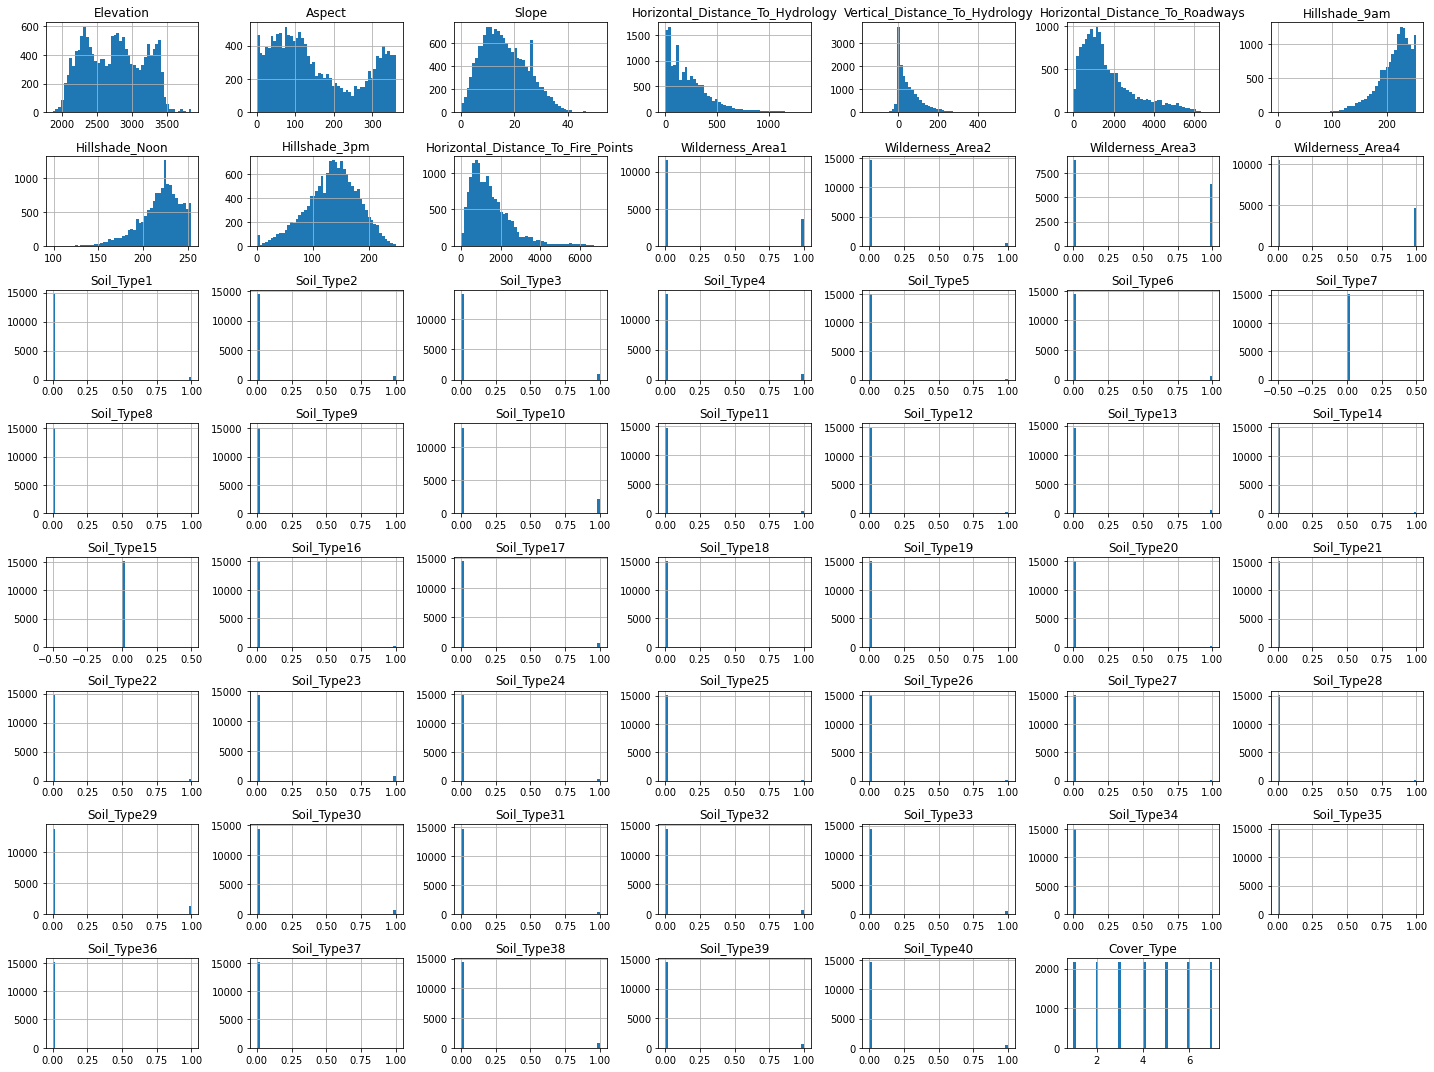

In [11]:
#Histogram of all attributes
datatrain.hist(bins=50, figsize=(20,15))
plt.tight_layout()    
plt.show()

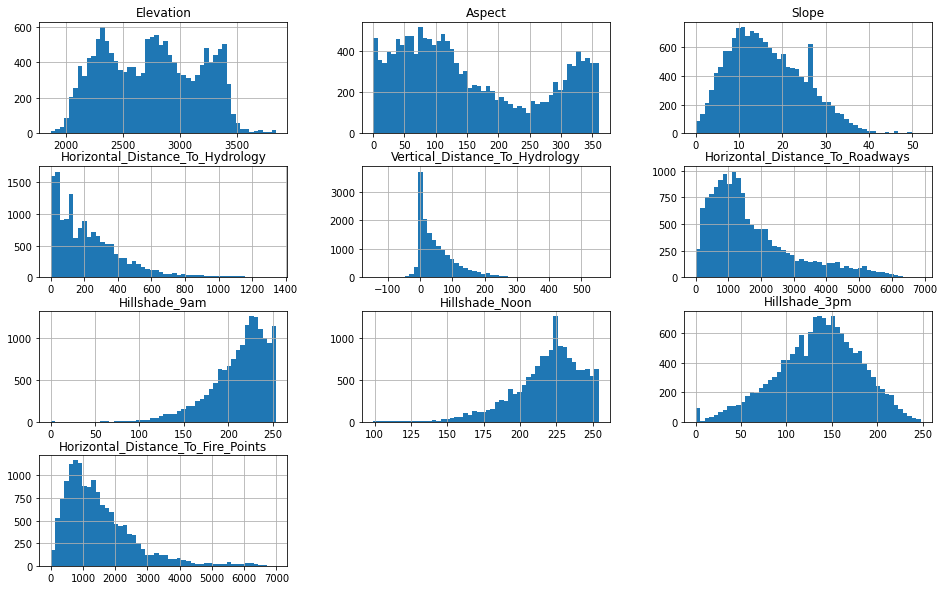

In [12]:
#Check the first 10
datatrain.iloc[:,:10].hist(figsize=(16,10), bins=50) 
plt.show() 

In [13]:
#Wilderness_AreaX and Soil_TypeX features are binary features with values 0 and 1
# Binary variables and target
wild_var = [f"Wilderness_Area{i}" for i in range(1, 5)]
soil_var = [f"Soil_Type{i}" for i in range(1, 41)]
label_var = ["Cover_Type"]

print("Summary for 1 for Wilderness_AreaX features: ", datatrain[wild_var].sum().sum())
print("Summary for 1 for Soil_TypeX features: ", datatrain[soil_var].sum().sum())
print("No Wilderness_Area: ", (datatrain[wild_var].sum(axis=1) == 0).sum())
print("No Soil_Type: ", (datatrain[soil_var].sum(axis=1) == 0).sum())

Summary for 1 for Wilderness_AreaX features:  15120
Summary for 1 for Soil_TypeX features:  15120
No Wilderness_Area:  0
No Soil_Type:  0


In [14]:
# Separate discrete and continuous features
all_var = list(datatrain.columns)
discrete_var = wild_var + soil_var + label_var
continuous_var = [x for x in all_var if x not in discrete_var]

# Look at the coherence of the data
datatrain[continuous_var].describe()

Elevation        Aspect         Slope  \
count  15120.000000  15120.000000  15120.000000   
mean    2749.322553    156.676653     16.501587   
std      417.678187    110.085801      8.453927   
min     1863.000000      0.000000      0.000000   
25%     2376.000000     65.000000     10.000000   
50%     2752.000000    126.000000     15.000000   
75%     3104.000000    261.000000     22.000000   
max     3849.000000    360.000000     52.000000   

       Horizontal_Distance_To_Hydrology  Vertical_Distance_To_Hydrology  \
count                      15120.000000                    15120.000000   
mean                         227.195701                       51.076521   
std                          210.075296                       61.239406   
min                            0.000000                     -146.000000   
25%                           67.000000                        5.000000   
50%                          180.000000                       32.000000   
75%                          330.000000                       79.000000   
max                         1343.000000                      554.000000   

       Horizontal_Distance_To_Roadways  Hillshade_9am  Hillshade_Noon  \
count                     15120.000000   15120.000000    15120.000000   
mean                       1714.023214     212.704299      218.965608   
std                        1325.066358      30.561287       22.801966   
min                           0.000000       0.000000       99.000000   
25%                         764.000000     196.000000      207.000000   
50%                        1316.000000     220.000000      223.000000   
75%                        2270.000000     235.000000      235.000000   
max                        6890.000000     254.000000      254.000000   

       Hillshade_3pm  Horizontal_Distance_To_Fire_Points  
count   15120.000000                        15120.000000  
mean      135.091997                         1511.147288  
std        45.895189                         1099.936493  
min         0.000000                            0.000000  
25%       106.000000                          730.000000  
50%       138.000000                         1256.000000  
75%       167.000000                         1988.250000  
max       248.000000                         6993.000000

In [15]:
# Find correlations 
corr_cover = datatrain.corr()["Cover_Type"].sort_values()
print(corr_cover)
#Soil_Type7, 15, show that the value is always 0 for all data points. These variable are useless.

Wilderness_Area1                     -0.230117
Soil_Type29                          -0.218564
Soil_Type22                          -0.195993
Soil_Type23                          -0.158762
Soil_Type32                          -0.132312
Soil_Type12                          -0.129985
Horizontal_Distance_To_Roadways      -0.105662
Soil_Type24                          -0.100797
Hillshade_Noon                       -0.098905
Horizontal_Distance_To_Fire_Points   -0.089389
Soil_Type31                          -0.079882
Soil_Type33                          -0.078955
Hillshade_3pm                        -0.053399
Soil_Type20                          -0.053013
Soil_Type19                          -0.031824
Soil_Type4                           -0.027816
Soil_Type9                           -0.027012
Soil_Type21                          -0.024410
Soil_Type27                          -0.023109
Soil_Type26                          -0.017184
Soil_Type3                           -0.016393
Soil_Type28  

In [16]:
# Look at the most correlated binary features
print("Positive Soil_Type38 values: ", (datatrain["Soil_Type38"] == 1).sum())
print("Positive Soil_Type39 values: ", (datatrain["Soil_Type39"] == 1).sum())
print("Positive Wilderness_Area1 values: ", (datatrain["Wilderness_Area1"] == 1).sum())
print("Positive Soil_Type29 values: ", (datatrain["Soil_Type29"] == 1).sum())

Positive Soil_Type38 values:  728
Positive Soil_Type39 values:  657
Positive Wilderness_Area1 values:  3597
Positive Soil_Type29 values:  1291


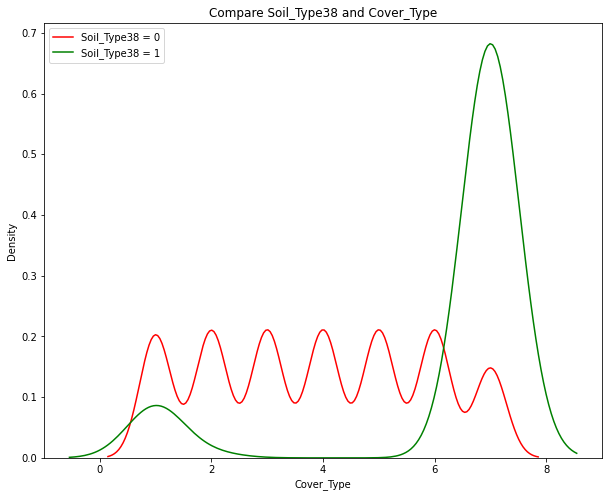

In [17]:
plt.figure(1, figsize=(10, 8))
sns.kdeplot(datatrain.loc[datatrain["Soil_Type38"] == 0, "Cover_Type"], label="Soil_Type38 = 0", color="red")
sns.kdeplot(datatrain.loc[datatrain["Soil_Type38"] == 1, "Cover_Type"], label="Soil_Type38 = 1", color="green")

plt.legend(loc="best")
plt.title("Compare Soil_Type38 and Cover_Type")

plt.show()
#Soil_Type38 with 1 has more chance be for the 2nd and the 7th cover_type

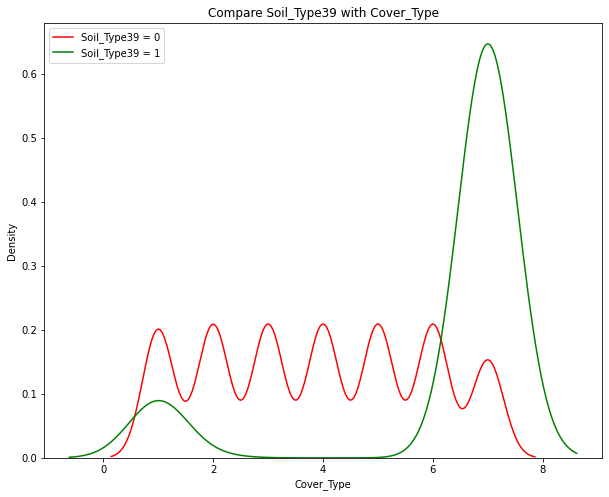

In [18]:
plt.figure(1, figsize=(10, 8))
sns.kdeplot(datatrain.loc[datatrain["Soil_Type39"] == 0, "Cover_Type"], label="Soil_Type39 = 0", color="red")
sns.kdeplot(datatrain.loc[datatrain["Soil_Type39"] == 1, "Cover_Type"], label="Soil_Type39 = 1", color="green")

plt.legend(loc="best")
plt.title("Compare Soil_Type39 with Cover_Type")

plt.show()
#Soil_Type39 with 1 has more chance be for the 2nd and the 7th cover_type

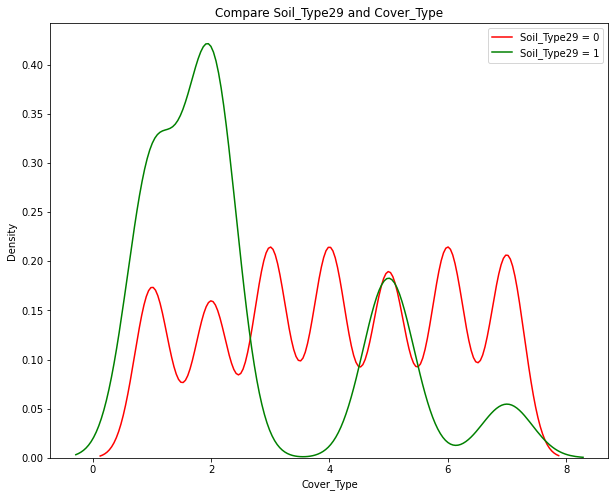

In [19]:
plt.figure(1, figsize=(10, 8))
sns.kdeplot(datatrain.loc[datatrain["Soil_Type29"] == 0, "Cover_Type"], label="Soil_Type29 = 0", color="red")
sns.kdeplot(datatrain.loc[datatrain["Soil_Type29"] == 1, "Cover_Type"], label="Soil_Type29 = 1", color="green")

plt.legend(loc="best")
plt.title("Compare Soil_Type29 and Cover_Type")

plt.show()
#Soil_Type38 with 1 has more chance be for the 1st, 2nd, 5th and the 7th cover_type

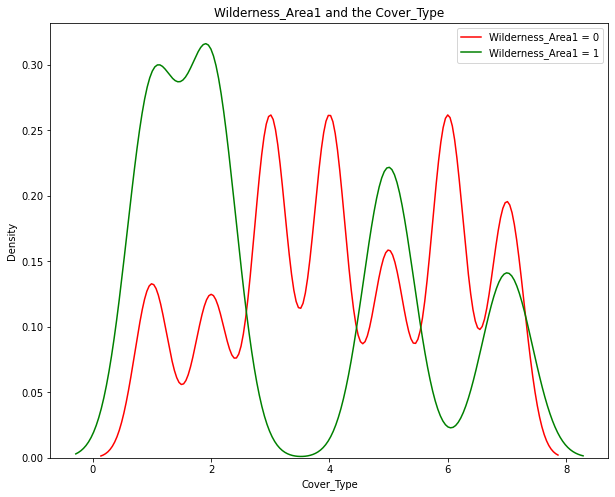

In [20]:

plt.figure(1, figsize=(10, 8))
sns.kdeplot(datatrain.loc[datatrain["Wilderness_Area1"] == 0, "Cover_Type"], label="Wilderness_Area1 = 0", color="red")
sns.kdeplot(datatrain.loc[datatrain["Wilderness_Area1"] == 1, "Cover_Type"], label="Wilderness_Area1 = 1", color="green")

plt.legend(loc="best")
plt.title("Wilderness_Area1 and the Cover_Type")

plt.show()
#Wilderness_Area1 with 1 has more chance be for the 1st, 2nd, 5th and the 7th cover_type

In [21]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autoawait  %autocall  %automagic  %autosave  %bookmark  %cd  %clear  %cls  %colors  %conda  %config  %connect_info  %copy  %ddir  %debug  %dhist  %dirs  %doctest_mode  %echo  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %macro  %magic  %matplotlib  %mkdir  %more  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %pip  %popd  %pprint  %precision  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %ren  %rep  %rerun  %reset  %reset_selective  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%cmd  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%markdown  %%perl  %%prun  %%pypy  %%python 

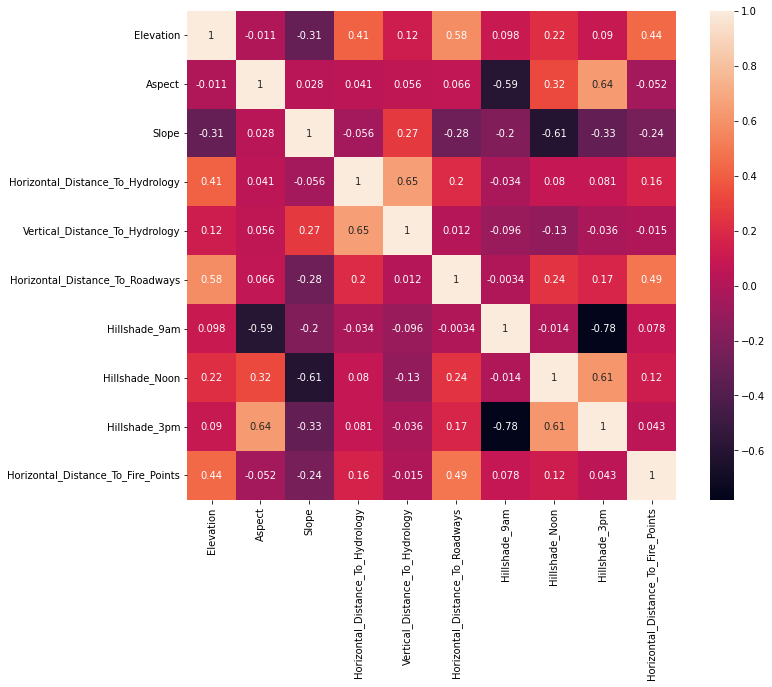

In [22]:
#Correlation Matrix
corr = datatrain.iloc[:,:10].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, square=True, annot=True);

In [23]:
cols1 = datatrain.columns 
df_corr = datatrain.corr()
threshold = 0.5 #50% correlation 

#searching for highly correlated continuous features  
corr_list = []
for i in range(0, 10):
    for j in range(i+1, 10): 
        if (df_corr.iloc[i, j] >= threshold and df_corr.iloc[i,j] < 1) or (
            df_corr.iloc[i,j] < 0 and df_corr.iloc[i,j] <= -threshold):
            corr_list.append([df_corr.iloc[i, j], i, j]) 

#higher first            
sort_corr_list = sorted(corr_list, key=lambda x: -abs(x[0]))

for v,i,j in sort_corr_list:
    print ("%s and %s = %.2f" % (cols1[i],cols1[j],v))

Hillshade_9am and Hillshade_3pm = -0.78
Horizontal_Distance_To_Hydrology and Vertical_Distance_To_Hydrology = 0.65
Aspect and Hillshade_3pm = 0.64
Hillshade_Noon and Hillshade_3pm = 0.61
Slope and Hillshade_Noon = -0.61
Aspect and Hillshade_9am = -0.59
Elevation and Horizontal_Distance_To_Roadways = 0.58


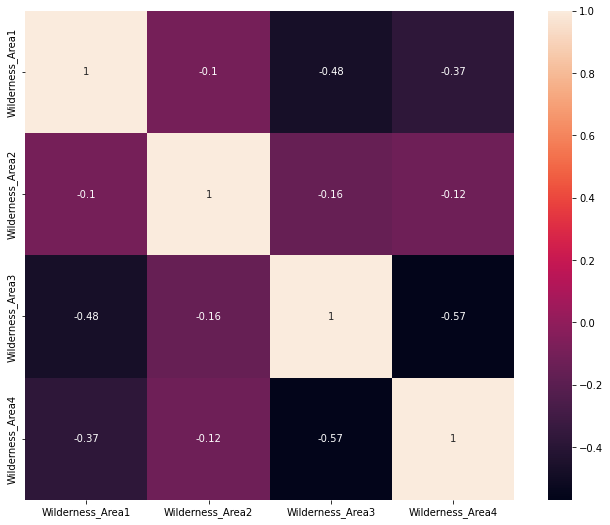

In [24]:
corr_soil2 = datatrain.iloc[:,10:14].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_soil2, square=True, annot=True);

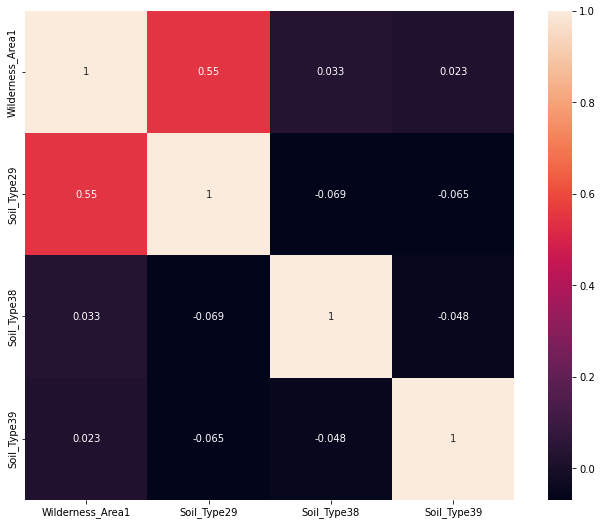

In [25]:
#Correlation Matrix
corr_soil = datatrain[["Wilderness_Area1","Soil_Type29","Soil_Type38","Soil_Type39"]].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_soil, square=True, annot=True);

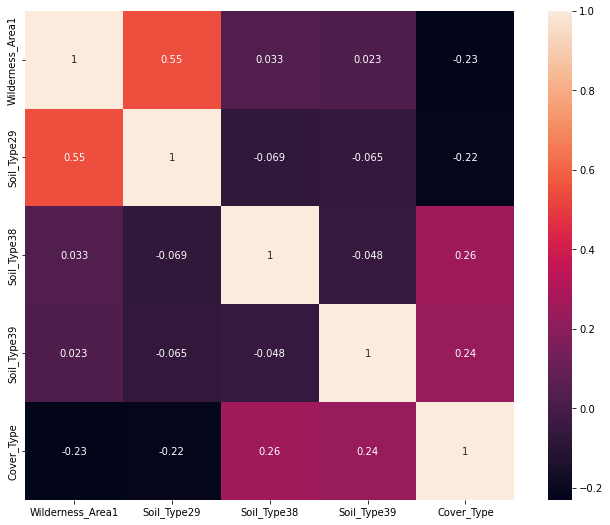

In [26]:
#Correlation Matrix
corr_soil = datatrain[["Wilderness_Area1","Soil_Type29","Soil_Type38","Soil_Type39","Cover_Type"]].corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr_soil, square=True, annot=True);

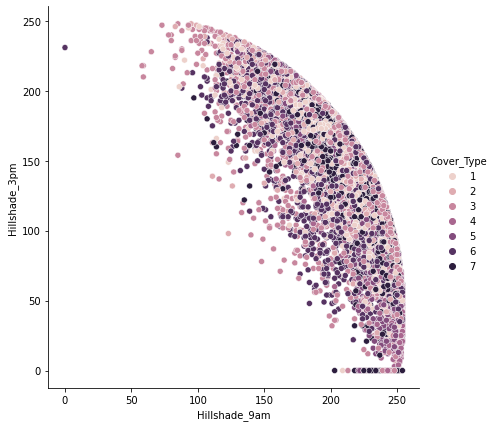

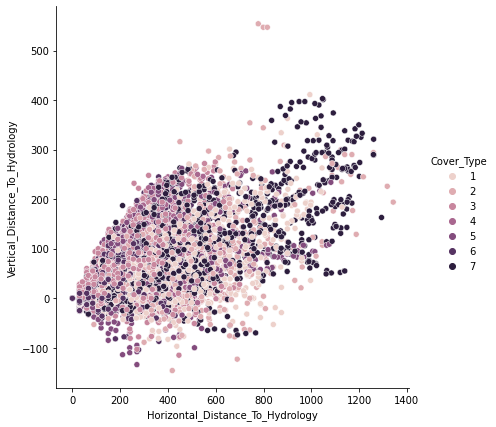

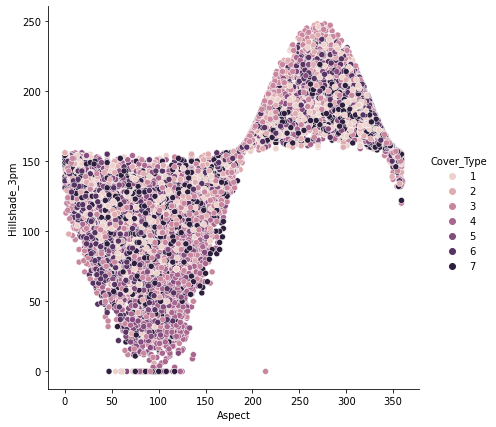

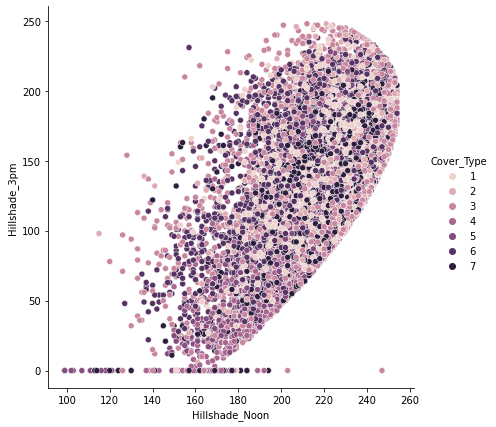

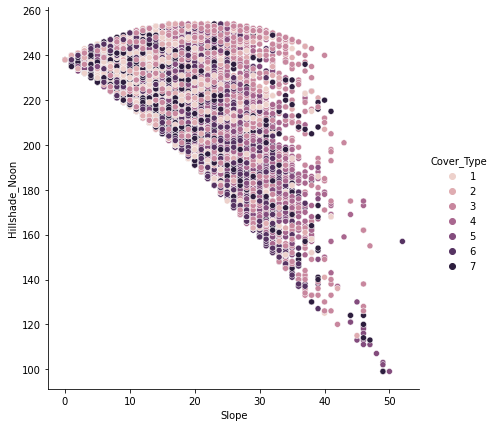

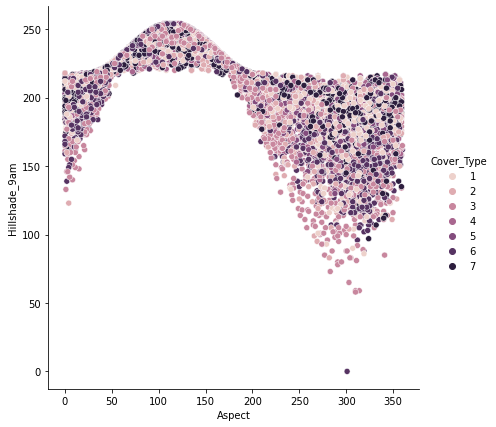

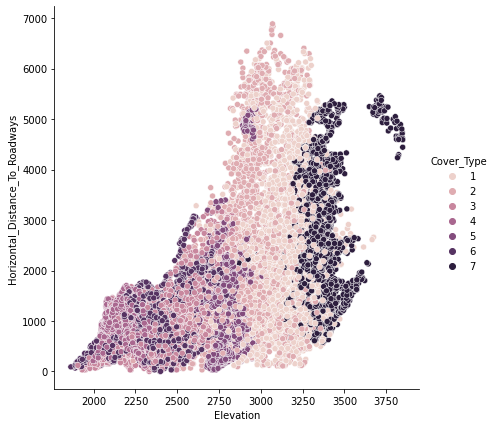

In [27]:
#Pairplot of target variable with highly correlated dependent variables 
for v,i,j in sort_corr_list:
    sns.pairplot(datatrain, hue='Cover_Type', height=6, x_vars=datatrain.columns[i],y_vars=datatrain.columns[j] )
    plt.show()

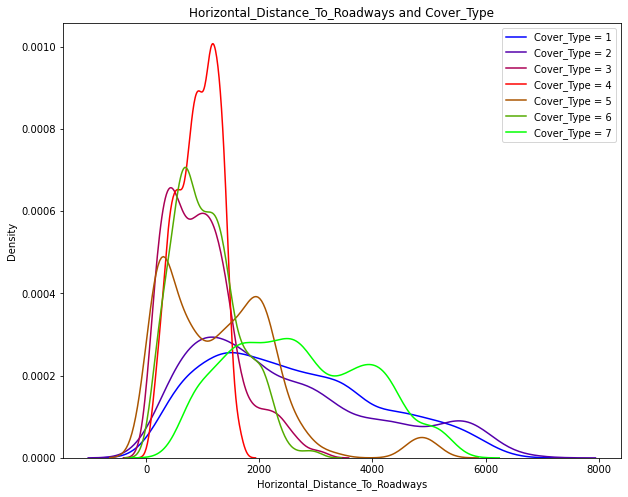

In [28]:
plt.figure(figsize=(10, 8))

color = iter(plt.cm.brg(np.linspace(0, 1, 7)))

sns.kdeplot(datatrain.loc[datatrain["Cover_Type"] == 1, "Horizontal_Distance_To_Roadways"], label="Cover_Type = 1", color=next(color))
sns.kdeplot(datatrain.loc[datatrain["Cover_Type"] == 2, "Horizontal_Distance_To_Roadways"], label="Cover_Type = 2", color=next(color))
sns.kdeplot(datatrain.loc[datatrain["Cover_Type"] == 3, "Horizontal_Distance_To_Roadways"], label="Cover_Type = 3", color=next(color))
sns.kdeplot(datatrain.loc[datatrain["Cover_Type"] == 4, "Horizontal_Distance_To_Roadways"], label="Cover_Type = 4", color=next(color))
sns.kdeplot(datatrain.loc[datatrain["Cover_Type"] == 5, "Horizontal_Distance_To_Roadways"], label="Cover_Type = 5", color=next(color))
sns.kdeplot(datatrain.loc[datatrain["Cover_Type"] == 6, "Horizontal_Distance_To_Roadways"], label="Cover_Type = 6", color=next(color))
sns.kdeplot(datatrain.loc[datatrain["Cover_Type"] == 7, "Horizontal_Distance_To_Roadways"], label="Cover_Type = 7", color=next(color))

plt.legend(loc="best")
plt.title("Horizontal_Distance_To_Roadways and Cover_Type")

plt.show()

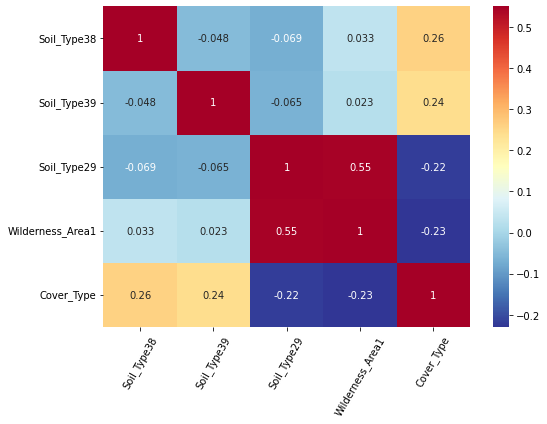

In [29]:
most_corr = datatrain[["Soil_Type38", "Soil_Type39", "Soil_Type29", "Wilderness_Area1", "Cover_Type"]].corr()


plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(most_corr, cmap=plt.cm.RdYlBu_r, vmin=-0.23, annot=True, vmax=0.55)

plt.xticks(rotation=60)

plt.tight_layout()
# plt.savefig("report/figures/basecorr.png", facecolor="white")
plt.show()
#Soil_Type29 and Wilderness_Area1 give similar information about the cover types

In [30]:
def plot_rep(df, feature):
    
    plt.figure(figsize=(10, 8))

    color = iter(plt.cm.Accent(np.linspace(0, 1, 7)))

    for i in range(1, 8):
    
        sns.kdeplot(df.loc[datatrain["Cover_Type"] == i, feature], label=f"Cover_Type = {i}", color=next(color))

    plt.legend(loc="best")
    plt.title(f"Repartition of {feature} among Cover_Type")

    plt.show()
    
def plot_scatter(df, feat1, feat2):
    
    fig = plt.figure(figsize=(16,8))

    color = iter(plt.cm.Accent(np.linspace(0, 1, 7)))

    for i in range(1, 8):
    
        plt.scatter(
            datatrain.loc[datatrain["Cover_Type"] == i, feat1],
            datatrain.loc[datatrain["Cover_Type"] == i, feat2],
            color=next(color), s=100, label=f"Cover_Type = 1{i}"
        )

    plt.xlabel(feat1)
    plt.ylabel(feat2)
    plt.legend(loc="best")

    plt.show()

In [37]:
from sklearn.impute import SimpleImputer

# Add ratio of distances to hydrology
datatrain["Ratio_Distance_To_Hydrology"] = datatrain["Vertical_Distance_To_Hydrology"]/datatrain["Horizontal_Distance_To_Hydrology"]

# Add Log of distance to hydrology
datatrain["Horizontal_Distance_To_Hydrology_Log"] = np.log(1+datatrain["Horizontal_Distance_To_Hydrology"])

# Add Log of distance to fire points
datatrain["Horizontal_Distance_To_Roadways_Log"] = np.log(1+datatrain["Horizontal_Distance_To_Roadways"])

# Add Max of known values
datatrain["Max"] = datatrain.max(axis=1)

# Add Std of known values
datatrain["Std"] = datatrain.std(axis=1)

# There might be missing values for the ratio (0 horizontal distance)
imp = SimpleImputer(strategy="median")

datatrain[["Ratio_Distance_To_Hydrology"]] = imp.fit_transform(datatrain[["Ratio_Distance_To_Hydrology"]])

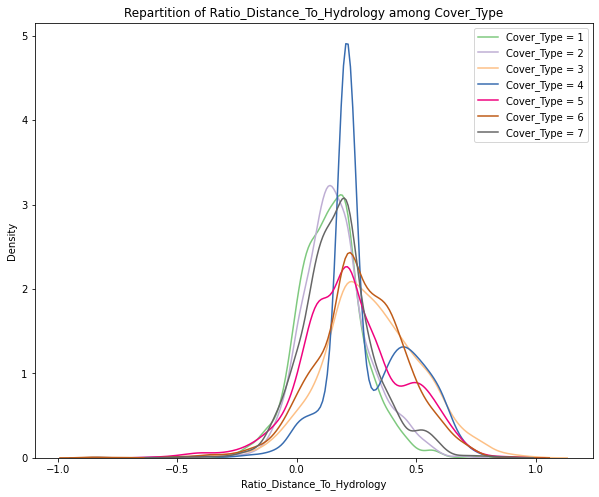

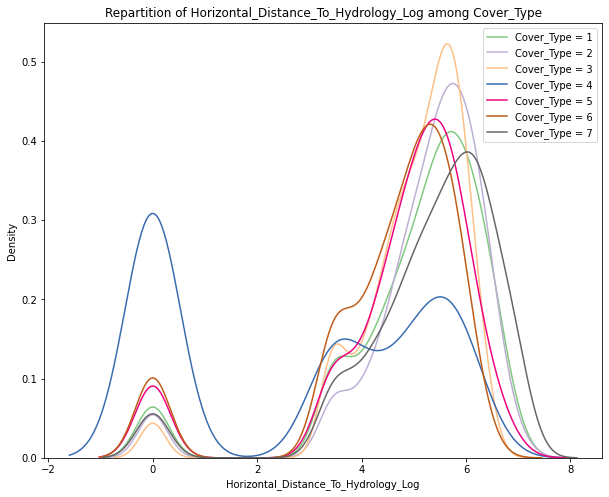

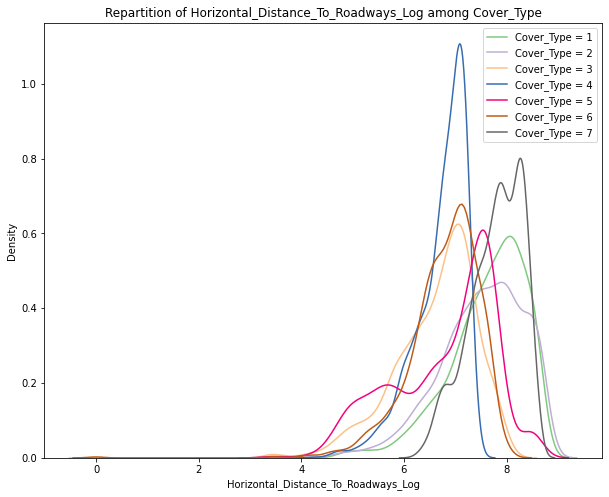

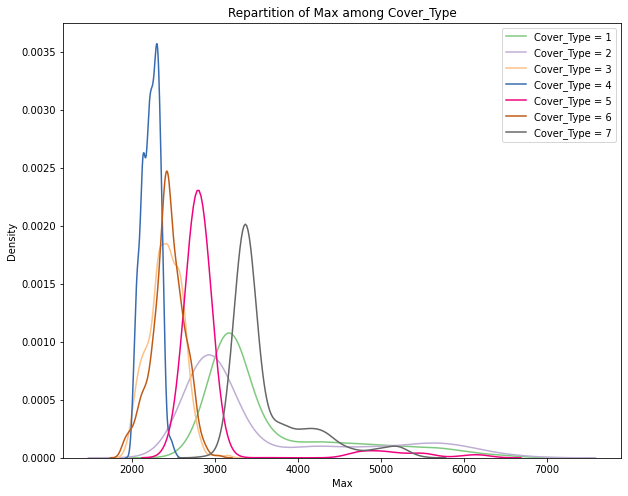

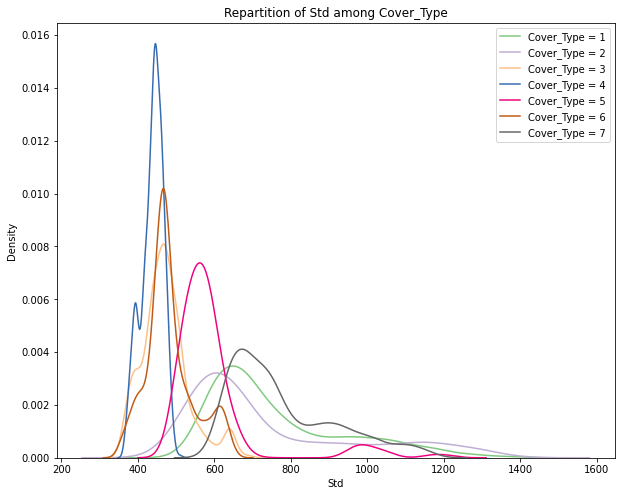

In [38]:
plot_rep(datatrain, "Ratio_Distance_To_Hydrology")
plot_rep(datatrain, "Horizontal_Distance_To_Hydrology_Log")
plot_rep(datatrain, "Horizontal_Distance_To_Roadways_Log")
plot_rep(datatrain, "Max")
plot_rep(datatrain, "Std")

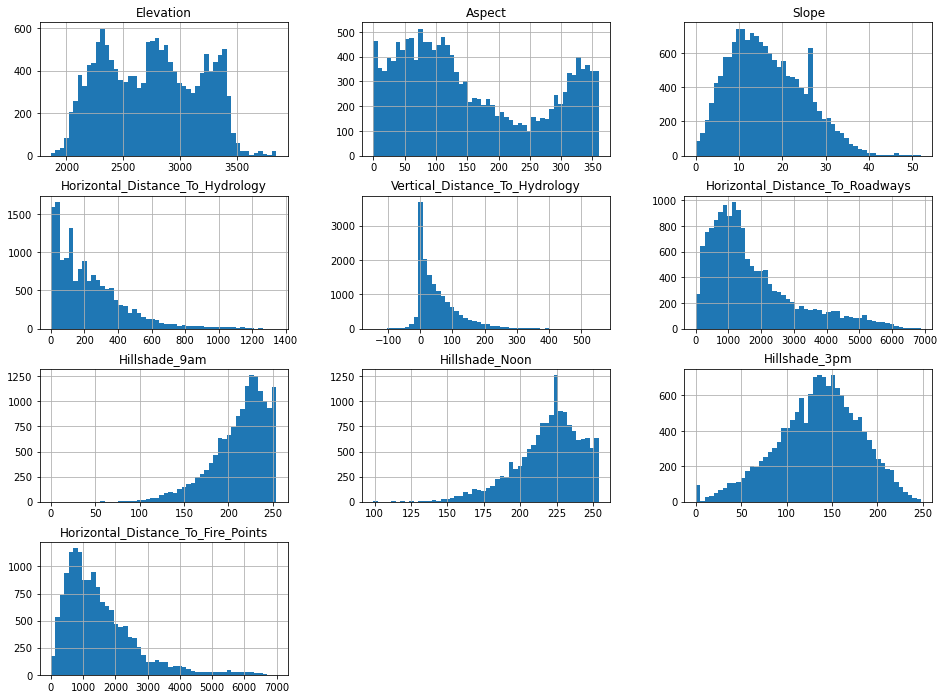

In [39]:
datatrain[continuous_var].hist(figsize=(16, 12), bins=50)
plt.show()

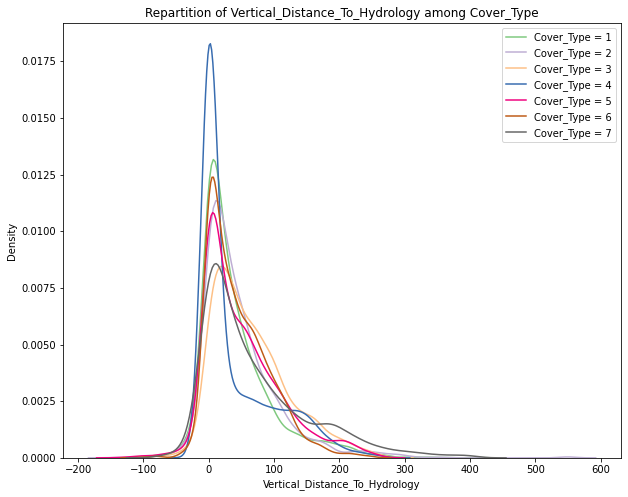

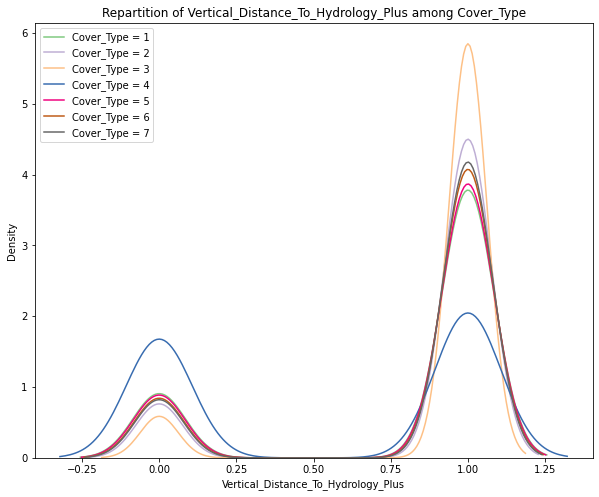

In [42]:
#Check only Vertical distance to hydrology, since most of them are positive
datatrain["Vertical_Distance_To_Hydrology_Plus"] = (datatrain["Vertical_Distance_To_Hydrology"] > 0).astype(int)

plot_rep(datatrain, "Vertical_Distance_To_Hydrology")
plot_rep(datatrain, "Vertical_Distance_To_Hydrology_Plus")

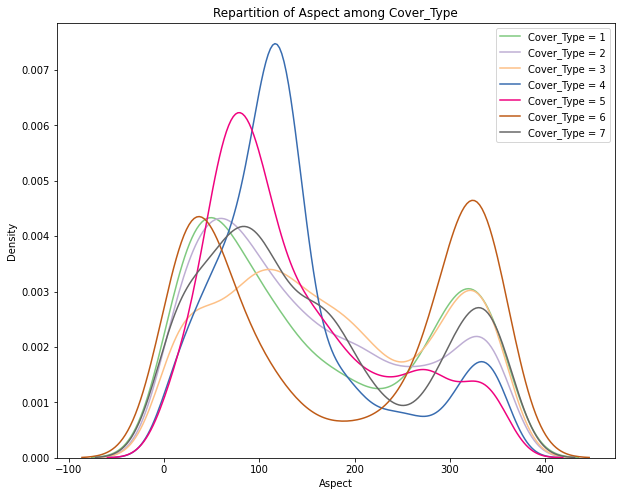

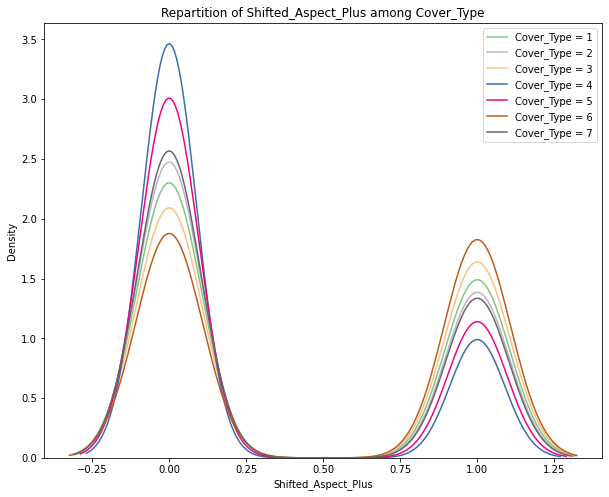

In [43]:
# Aspect values are among 0 to 360. Let's create Aspect to -180:180 and its positive.

datatrain["Shifted_Aspect"] = datatrain["Aspect"] - 180
datatrain["Shifted_Aspect_Plus"] = (datatrain["Shifted_Aspect"] > 0).astype(int)

plot_rep(datatrain, "Aspect")
plot_rep(datatrain, "Shifted_Aspect_Plus")

In [45]:
#Check the total distance to hidrology
datatrain["Distance_To_Hydrology"] = (datatrain["Horizontal_Distance_To_Hydrology"].pow(2) + datatrain["Vertical_Distance_To_Hydrology"].pow(2)).pow(0.5)

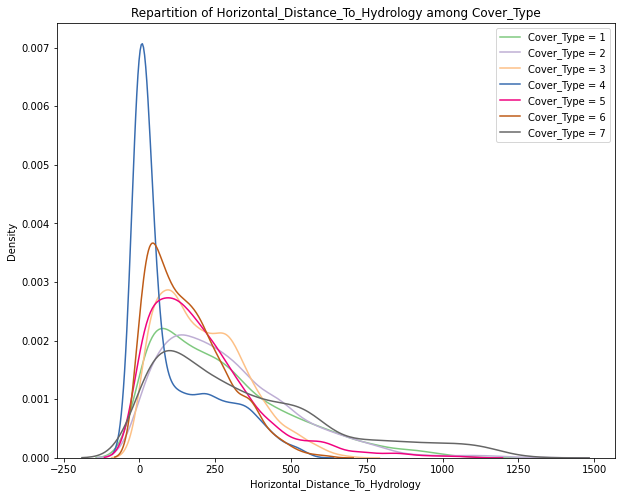

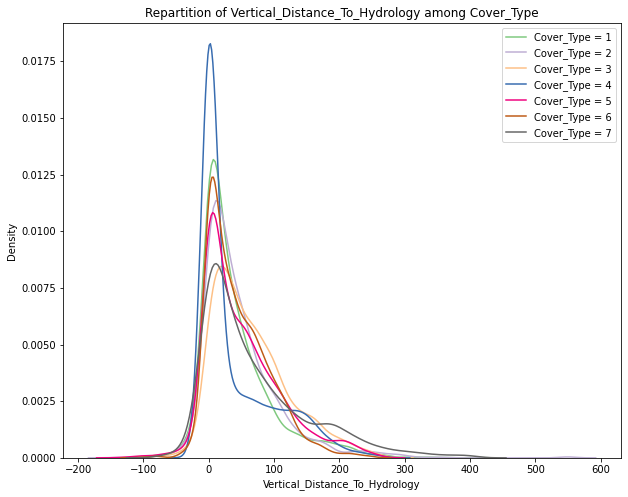

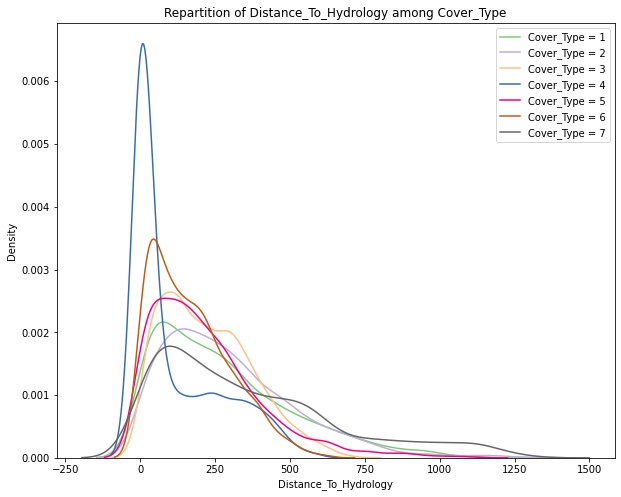

In [46]:
plot_rep(datatrain, "Horizontal_Distance_To_Hydrology")
plot_rep(datatrain, "Vertical_Distance_To_Hydrology")
plot_rep(datatrain, "Distance_To_Hydrology")

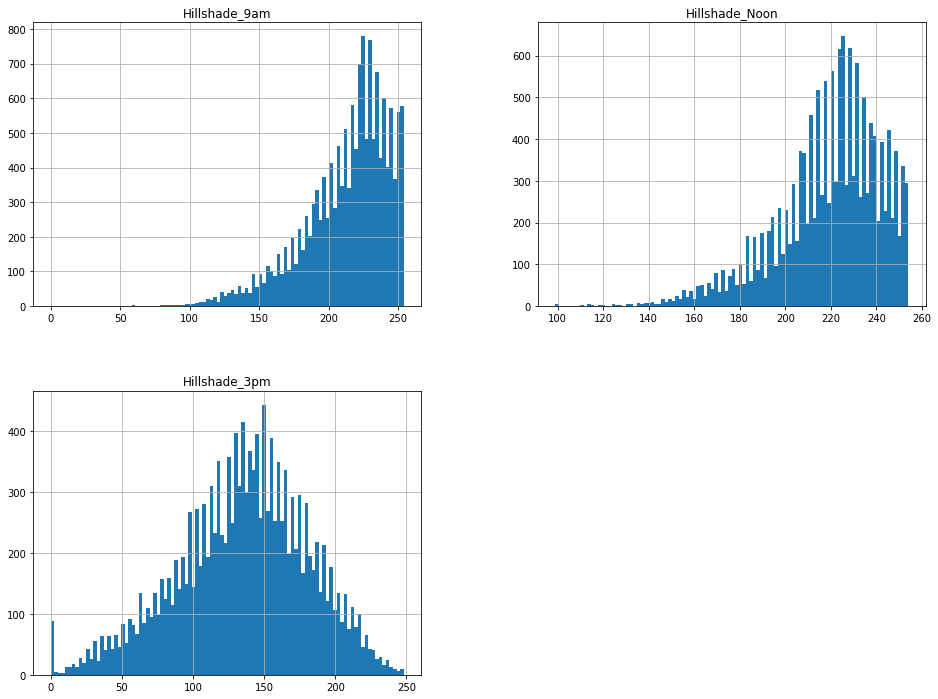

In [47]:
#Let's look at hillshade
hillshades = ["Hillshade_9am", "Hillshade_Noon", "Hillshade_3pm"]

datatrain[hillshades].hist(figsize=(16, 12), bins=100)
plt.show()

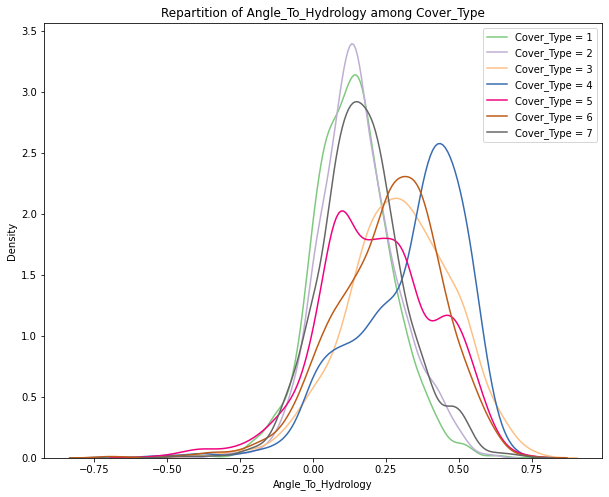

In [48]:
datatrain["Angle_To_Hydrology"] = np.arctan(
    datatrain["Vertical_Distance_To_Hydrology"]/datatrain["Horizontal_Distance_To_Hydrology"]
)

plot_rep(datatrain, "Angle_To_Hydrology")

In [49]:
datatrain["Mean_Hillshade"] = datatrain[hillshades].sum(axis=1)/3
datatrain["Aspect Hillshade_3pm"] = datatrain["Aspect"] * datatrain["Hillshade_3pm"]

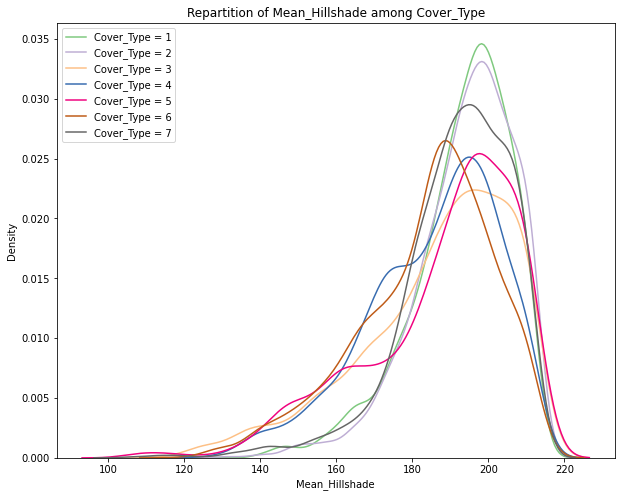

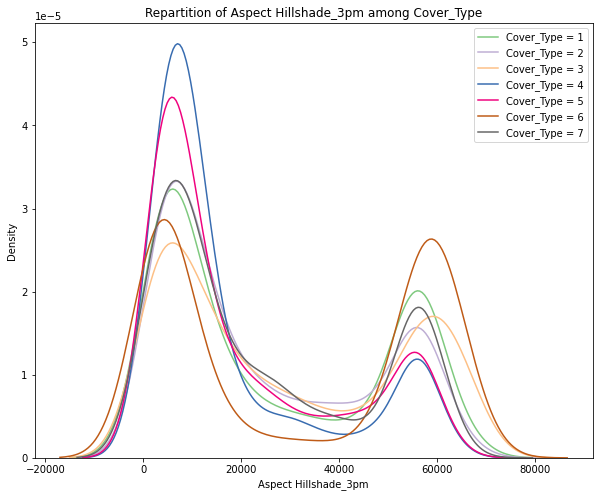

In [50]:
plot_rep(datatrain, "Mean_Hillshade")
plot_rep(datatrain, "Aspect Hillshade_3pm")

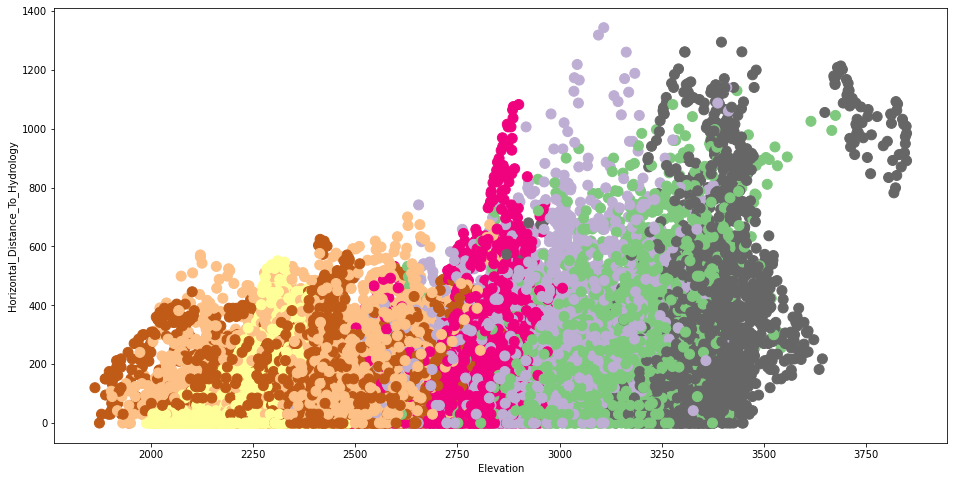

In [51]:
fig = plt.figure(figsize=(16,8))

plt.scatter(
    datatrain["Elevation"], datatrain["Horizontal_Distance_To_Hydrology"],
    c=datatrain.Cover_Type.values/7, s=100, cmap=plt.cm.Accent
)
plt.xlabel("Elevation")
plt.ylabel("Horizontal_Distance_To_Hydrology")

plt.show()

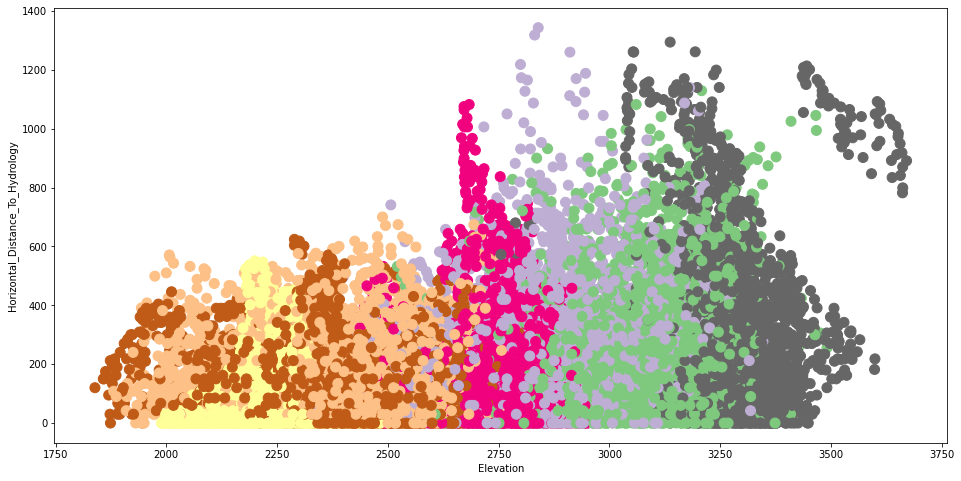

In [52]:
fig = plt.figure(figsize=(16,8))

plt.scatter(
    datatrain["Elevation"]-0.2*datatrain["Horizontal_Distance_To_Hydrology"],
    datatrain["Horizontal_Distance_To_Hydrology"],
    c=datatrain.Cover_Type.values/7, s=100, cmap=plt.cm.Accent
)
plt.xlabel("Elevation")
plt.ylabel("Horizontal_Distance_To_Hydrology")

plt.show()

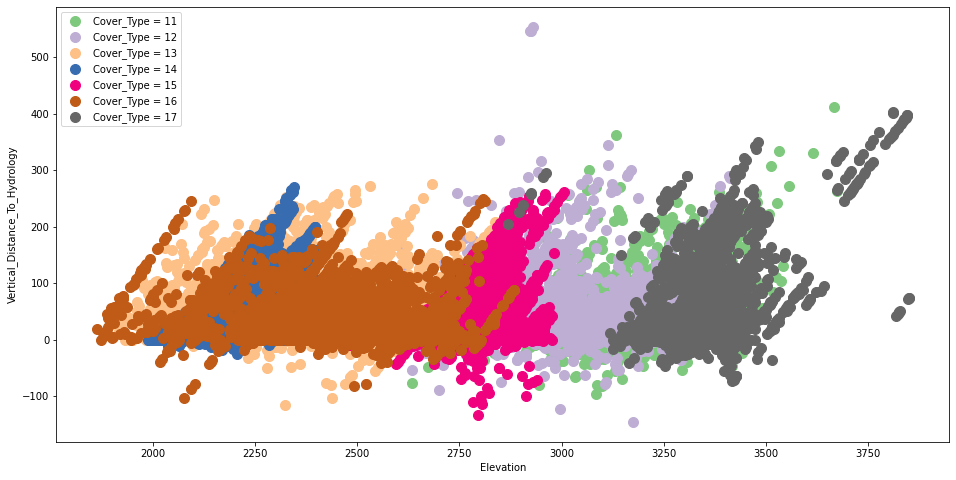

In [53]:
plot_scatter(datatrain, "Elevation", "Vertical_Distance_To_Hydrology")

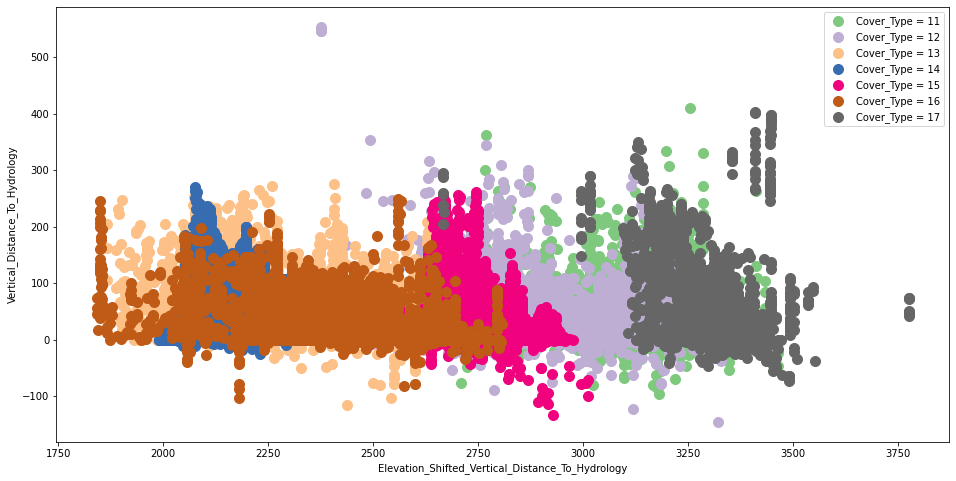

In [54]:
datatrain["Elevation_Shifted_Vertical_Distance_To_Hydrology"] = datatrain["Elevation"]-datatrain["Vertical_Distance_To_Hydrology"]

plot_scatter(datatrain, "Elevation_Shifted_Vertical_Distance_To_Hydrology", "Vertical_Distance_To_Hydrology")

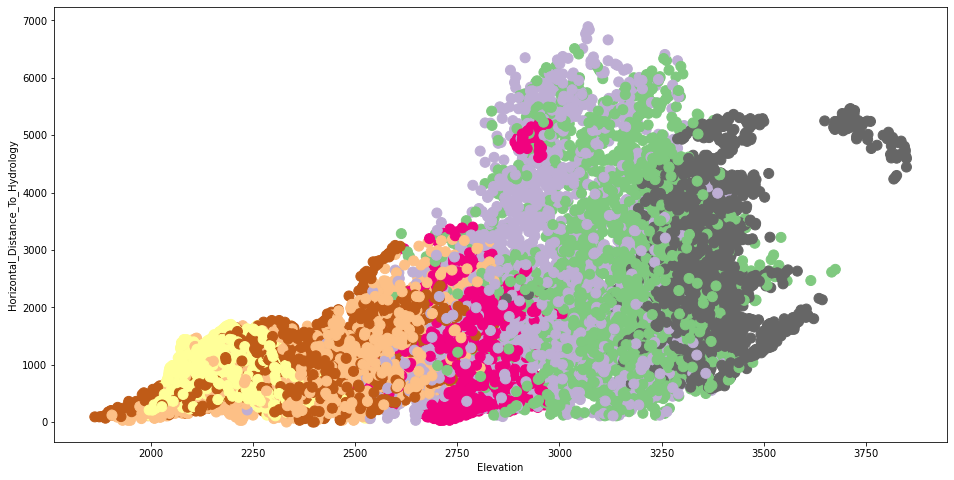

In [60]:
fig = plt.figure(figsize=(16,8))

plt.scatter(
    datatrain["Elevation"]-0.00001*datatrain["Horizontal_Distance_To_Roadways"],
    datatrain["Horizontal_Distance_To_Roadways"],
    c=datatrain.Cover_Type.values/7, s=100, cmap=plt.cm.Accent
)
plt.xlabel("Elevation")
plt.ylabel("Horizontal_Distance_To_Hydrology")

plt.show()

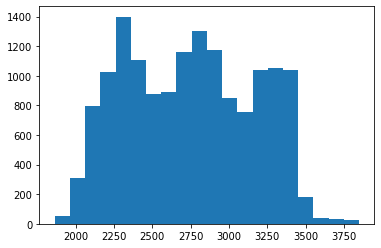

In [61]:
plt.hist(datatrain["Elevation"], bins=20)

plt.show()

In [74]:
#Cut datarame into elevations points
label_names = [0, 1, 2]
cut_points = [500, 2500, 3000, 4000]
datatrain["Elevation_Plateau"] = pd.cut((datatrain["Elevation"] ), cut_points, labels=[0, 1, 2]).astype(int)

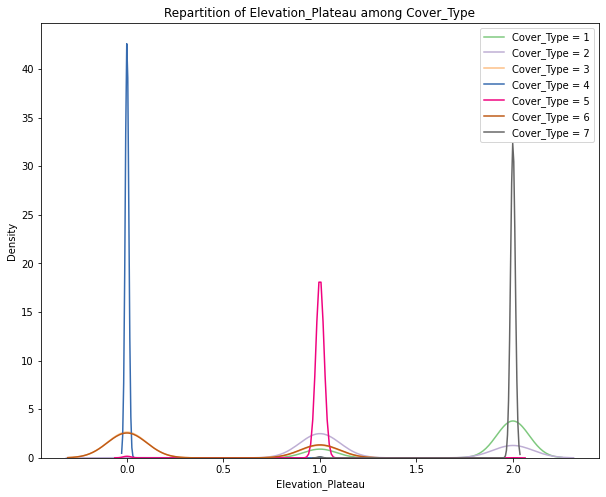

In [75]:
plot_rep(datatrain, "Elevation_Plateau")

In [76]:
#Concatenate some features
datatrain["Soil_Type12_32"] = datatrain["Soil_Type32"] + datatrain["Soil_Type12"]
datatrain["Soil_Type23_22_32_33"] = datatrain["Soil_Type23"] + datatrain["Soil_Type22"] + datatrain["Soil_Type32"] + datatrain["Soil_Type33"]
datatrain["Wilderness_Area1_plus_Soil_Type29"] = datatrain["Wilderness_Area1"] + datatrain["Soil_Type29"]
datatrain["Wilderness_Area4_plus_Soil_Type3"] = datatrain["Wilderness_Area4"] + datatrain["Soil_Type3"]

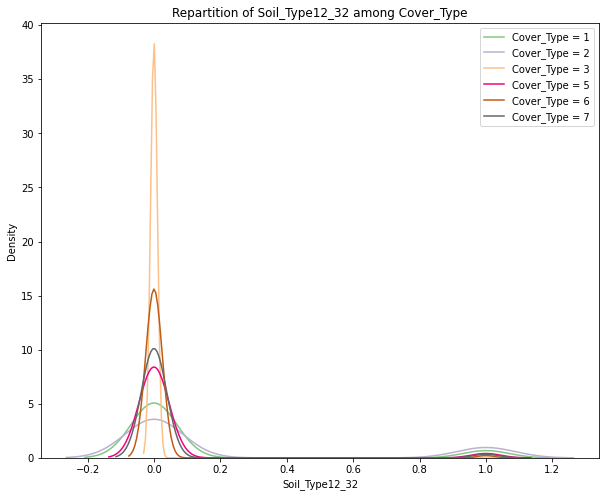

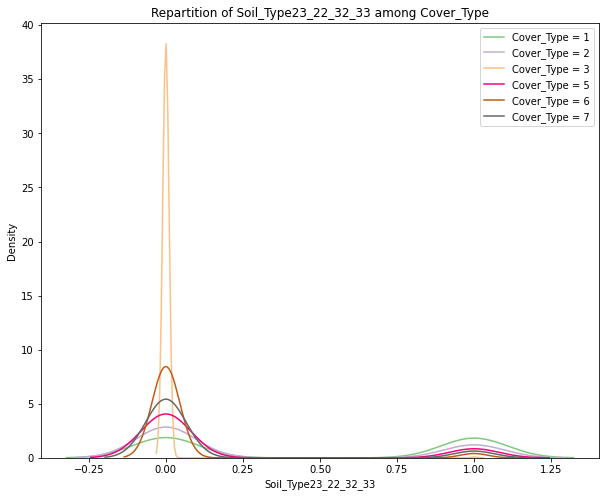

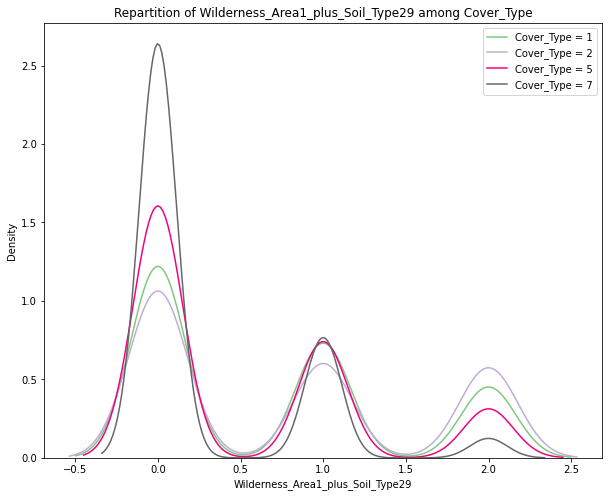

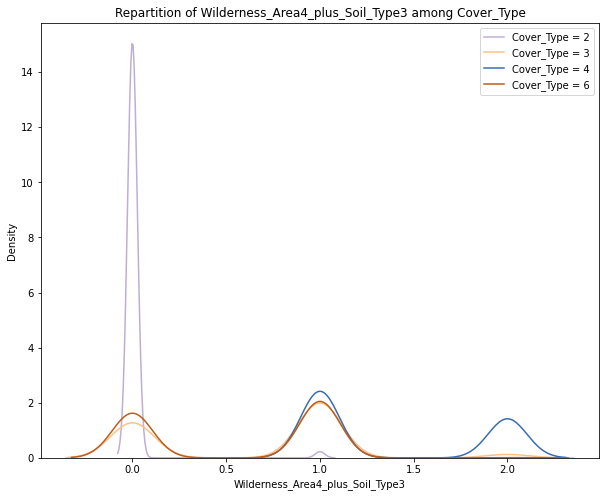

In [79]:
plot_rep(datatrain, "Soil_Type12_32")
plot_rep(datatrain, "Soil_Type23_22_32_33")
plot_rep(datatrain, "Wilderness_Area1_plus_Soil_Type29")
plot_rep(datatrain, "Wilderness_Area4_plus_Soil_Type3")